In [93]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt

f = open("dialogs.txt", "r")
print(f.read())
# reading the data 

How many hostels are available for girls at IIITD?	There is one girls hostels available for girls at IIITD.
What is the name of lab number 304?	RF and applied Electromagnetics Lab
Tell me a joke.	Why don't scientists trust atoms? Because they make up everything!
What is IIITD?	Indraprastha Institute of Information Technology, Delhi
How many hostels are there at IIITD?	At present, there are four hostels at IIITD, three for boys with 508 & 454 & 454 beds, and one for girls with 404 beds.
How many lecture halls does IIITD have?	IIITD has a total of 25 lecture halls of varying sizes.
What amenities are provided in the hostel rooms at IIITD?	The hostel rooms at IIITD are provided with night-time air conditioning in summers, heating in winters, and high-speed Internet connectivity.
How many hostels are there at IIITD, and what are their capacities?	At present, there are four hostels at IIITD, three for boys with 508 & 454 & 454 beds, and one for girls with 404 beds.
What are the types of roo

In [94]:
df=pd.read_csv('dialogs.txt',names=('Query','Response'),sep=('\t'))
# Reading the data

In [95]:
df
# loading the data

,Query,Response
0,How many hostels are available for girls at II...,There is one girls hostels available for girls...
1,What is the name of lab number 304?,RF and applied Electromagnetics Lab
2,Tell me a joke.,Why don't scientists trust atoms? Because they...
3,What is IIITD?,Indraprastha Institute of Information Technolo...
4,How many hostels are there at IIITD?,"At present, there are four hostels at IIITD, t..."
5,How many lecture halls does IIITD have?,IIITD has a total of 25 lecture halls of varyi...
6,What amenities are provided in the hostel room...,The hostel rooms at IIITD are provided with ni...
7,"How many hostels are there at IIITD, and what ...","At present, there are four hostels at IIITD, t..."
8,What are the types of rooms available in the h...,The hostels at IIITD offer single and double o...
9,Are students free to move around the IIITD cam...,"Yes, all hostel students at IIITD are complete..."


## Data Understanding

In [96]:
df.shape
# There are 3724 rows and 2 columns in our dataset

(25, 2)

In [97]:
df.columns
# Displaying the names of columns present in the dataset

Index(['Query', 'Response'], dtype='object')

In [98]:
df.info()
# Checking information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     25 non-null     object
 1   Response  25 non-null     object
dtypes: object(2)
memory usage: 532.0+ bytes


In [99]:
df.describe()
# Describe function shows us the frequency,unique and counts of all columns

,Query,Response
count,25,25
unique,24,23
top,How many hostels are available for girls at II...,There is one girls hostels available for girls...
freq,2,2


In [100]:
df.nunique()
# nunique() function return number of unique elements in the object. 

Query       24
Response    23
dtype: int64

In [101]:
df.isnull().sum()
# Checking for the presence of null values in the data. As we can see there are no null values present in the data

Query       0
Response    0
dtype: int64

In [102]:
df['Query'].value_counts()
# Checking the counts of the values present in the column 'Query'

Query
How many hostels are available for girls at IIITD?                        2
What is the name of lab number 304?                                       1
What is the purpose of the Digital Circuits Lab (DC Lab) at IIITD?        1
'When was IIITD established?'                                             1
What is the objective of the Shannon Lab at IIITD?                        1
What is the main focus of the Basic Electronics Lab (BE Lab) at IIITD?    1
Mess facilities in IIITD                                                  1
Food facilities in IIITD                                                  1
Tell me about IIITD infrastructure                                        1
Where are ECE Labs located at IIITD                                       1
What facilities are available in the gym at IIITD?                        1
What type of sports facilities are available at IIITD?                    1
What is the main focus of the Shannon Lab at IIITD?                       1
How ma

In [103]:
df['Response'].value_counts()
# Checking the counts of the values present in the column 'Response'

Response
There is one girls hostels available for girls at IIITD.                                                                                                                                                                                                                                                                                                                                                                                                                                    2
At present, there are four hostels at IIITD, three for boys with 508 & 454 & 454 beds, and one for girls with 404 beds.                                                                                                                                                                                                                                                                                                                                                                     2
IIITD offers a multi-purpose sports

## Data Visualization

In [104]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [105]:
Text=df['Query']

In [106]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)
        
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

How many hostels are available for girls at IIITD?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
What is the name of lab number 304?
neg: 0.0, neu: 0.843, pos: 0.157, compound: 0.0772, 
Tell me a joke.
neg: 0.0, neu: 0.476, pos: 0.524, compound: 0.296, 
What is IIITD?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
How many hostels are there at IIITD?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
How many lecture halls does IIITD have?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
What amenities are provided in the hostel rooms at IIITD?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
How many hostels are there at IIITD, and what are their capacities?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
What are the types of rooms available in the hostels at IIITD?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
Are students free to move around the IIITD campus at all times?
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.5106, 
How many boys hostel are there at IIITD?
neg: 0.0, neu: 1.0, pos: 0.0, c

In [107]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\iamaa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iamaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\iamaa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [108]:
df

,Query,Response,neg,neu,pos,compound
0,How many hostels are available for girls at II...,There is one girls hostels available for girls...,0.000,1.000,0.000,0.0000
1,What is the name of lab number 304?,RF and applied Electromagnetics Lab,0.000,0.843,0.157,0.0772
2,Tell me a joke.,Why don't scientists trust atoms? Because they...,0.000,0.476,0.524,0.2960
3,What is IIITD?,Indraprastha Institute of Information Technolo...,0.000,1.000,0.000,0.0000
4,How many hostels are there at IIITD?,"At present, there are four hostels at IIITD, t...",0.000,1.000,0.000,0.0000
5,How many lecture halls does IIITD have?,IIITD has a total of 25 lecture halls of varyi...,0.000,1.000,0.000,0.0000
6,What amenities are provided in the hostel room...,The hostel rooms at IIITD are provided with ni...,0.000,1.000,0.000,0.0000
7,"How many hostels are there at IIITD, and what ...","At present, there are four hostels at IIITD, t...",0.000,1.000,0.000,0.0000
8,What are the types of rooms available in the h...,The hostels at IIITD offer single and double o...,0.000,1.000,0.000,0.0000
9,Are students free to move around the IIITD cam...,"Yes, all hostel students at IIITD are complete...",0.000,0.769,0.231,0.5106


In [109]:
from wordcloud import WordCloud
# importing word cloud

In [110]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="black",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud    

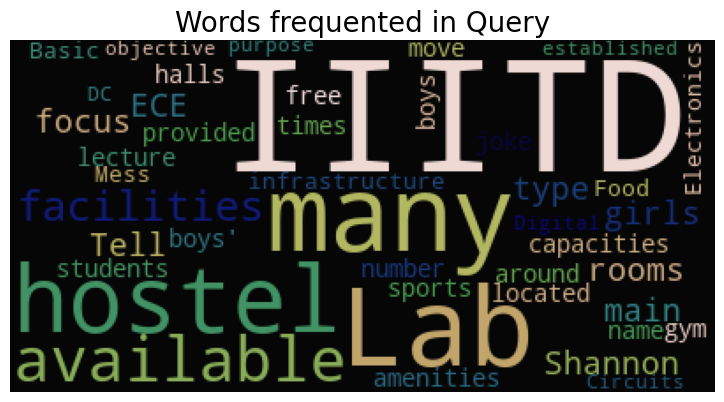

In [111]:
wordcloud(df,'Query')
# top words in the query column

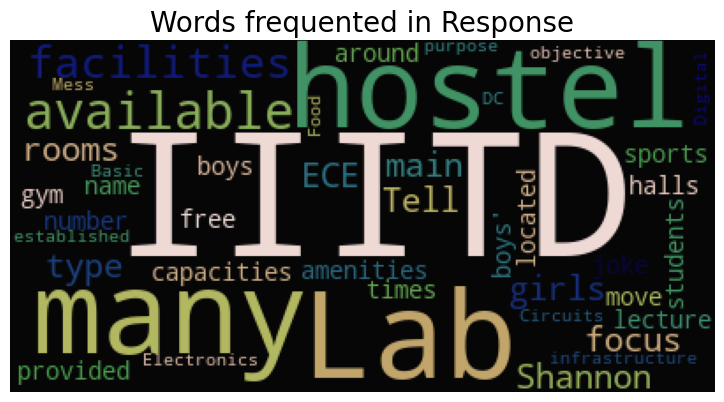

In [112]:
wordcloud(df,'Response')
# top words in the response column

## Text-Normalization

In [113]:
import re
# importing regular expressions

In [114]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# Lower case conversion

In [115]:
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value

In [116]:
# df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on query column
df['Query'] = df['Query'].map(remove_n)

In [117]:
# df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
df['Response'] = df['Response'].map(remove_n)
# using map function and applying the function on response column

In [118]:
df
# final cleaned dataset

,Query,Response,neg,neu,pos,compound
0,How many hostels are available for girls at II...,There is one girls hostels available for girls...,0.000,1.000,0.000,0.0000
1,What is the name of lab number 304?,RF and applied Electromagnetics Lab,0.000,0.843,0.157,0.0772
2,Tell me a joke.,Why don't scientists trust atoms? Because they...,0.000,0.476,0.524,0.2960
3,What is IIITD?,Indraprastha Institute of Information Technolo...,0.000,1.000,0.000,0.0000
4,How many hostels are there at IIITD?,"At present, there are four hostels at IIITD, t...",0.000,1.000,0.000,0.0000
5,How many lecture halls does IIITD have?,IIITD has a total of 25 lecture halls of varyi...,0.000,1.000,0.000,0.0000
6,What amenities are provided in the hostel room...,The hostel rooms at IIITD are provided with ni...,0.000,1.000,0.000,0.0000
7,"How many hostels are there at IIITD, and what ...","At present, there are four hostels at IIITD, t...",0.000,1.000,0.000,0.0000
8,What are the types of rooms available in the h...,The hostels at IIITD offer single and double o...,0.000,1.000,0.000,0.0000
9,Are students free to move around the IIITD cam...,"Yes, all hostel students at IIITD are complete...",0.000,0.769,0.231,0.5106


In [119]:
pd.set_option('display.max_rows',3800)
# Displaying all rows in the dataset

In [120]:
df

,Query,Response,neg,neu,pos,compound
0,How many hostels are available for girls at II...,There is one girls hostels available for girls...,0.000,1.000,0.000,0.0000
1,What is the name of lab number 304?,RF and applied Electromagnetics Lab,0.000,0.843,0.157,0.0772
2,Tell me a joke.,Why don't scientists trust atoms? Because they...,0.000,0.476,0.524,0.2960
3,What is IIITD?,Indraprastha Institute of Information Technolo...,0.000,1.000,0.000,0.0000
4,How many hostels are there at IIITD?,"At present, there are four hostels at IIITD, t...",0.000,1.000,0.000,0.0000
5,How many lecture halls does IIITD have?,IIITD has a total of 25 lecture halls of varyi...,0.000,1.000,0.000,0.0000
6,What amenities are provided in the hostel room...,The hostel rooms at IIITD are provided with ni...,0.000,1.000,0.000,0.0000
7,"How many hostels are there at IIITD, and what ...","At present, there are four hostels at IIITD, t...",0.000,1.000,0.000,0.0000
8,What are the types of rooms available in the h...,The hostels at IIITD offer single and double o...,0.000,1.000,0.000,0.0000
9,Are students free to move around the IIITD cam...,"Yes, all hostel students at IIITD are complete...",0.000,0.769,0.231,0.5106


### Important Sentence

In [121]:
imp_sent=df.sort_values(by='compound', ascending=False)
# arranging the compound column in descending order to find the best sentence. 

In [122]:
imp_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
9,Are students free to move around the IIITD cam...,"Yes, all hostel students at IIITD are complete...",0.0,0.769,0.231,0.5106
2,Tell me a joke.,Why don't scientists trust atoms? Because they...,0.0,0.476,0.524,0.2960
1,What is the name of lab number 304?,RF and applied Electromagnetics Lab,0.0,0.843,0.157,0.0772
0,How many hostels are available for girls at II...,There is one girls hostels available for girls...,0.0,1.000,0.000,0.0000
14,What type of sports facilities are available a...,"IIITD offers a multi-purpose sports field, two...",0.0,1.000,0.000,0.0000


### Top Positive Sentence

In [123]:
pos_sent=df.sort_values(by='pos', ascending=False)
# Arranging the dataframe by positive column in descending order to find the best postive sentence.

In [124]:
pos_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
2,Tell me a joke.,Why don't scientists trust atoms? Because they...,0.0,0.476,0.524,0.2960
9,Are students free to move around the IIITD cam...,"Yes, all hostel students at IIITD are complete...",0.0,0.769,0.231,0.5106
1,What is the name of lab number 304?,RF and applied Electromagnetics Lab,0.0,0.843,0.157,0.0772
0,How many hostels are available for girls at II...,There is one girls hostels available for girls...,0.0,1.000,0.000,0.0000
14,What type of sports facilities are available a...,"IIITD offers a multi-purpose sports field, two...",0.0,1.000,0.000,0.0000


### Top Negative Sentence

In [125]:
neg_sent=df.sort_values(by='neg', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best negative sentence.

In [126]:
neg_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
19,Mess facilities in IIITD,There are 2 floors of the students recreation ...,0.455,0.545,0.0,-0.3612
0,How many hostels are available for girls at II...,There is one girls hostels available for girls...,0.000,1.000,0.0,0.0000
13,How many hostels are available for girls at II...,There is one girls hostels available for girls...,0.000,1.000,0.0,0.0000
23,What is the purpose of the Digital Circuits La...,The Digital Circuits Lab (DC Lab) at IIITD is ...,0.000,1.000,0.0,0.0000
22,'When was IIITD established?',"IIITD was established by the Delhi Act, 2007.",0.000,1.000,0.0,0.0000


### Top Neutral Sentence

In [127]:
neu_sent=df.sort_values(by='neu', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best neutral sentence.

In [128]:
neu_sent.head(5)
# printing the first 5 rows

,Query,Response,neg,neu,pos,compound
0,How many hostels are available for girls at II...,There is one girls hostels available for girls...,0.0,1.0,0.0,0.0
13,How many hostels are available for girls at II...,There is one girls hostels available for girls...,0.0,1.0,0.0,0.0
23,What is the purpose of the Digital Circuits La...,The Digital Circuits Lab (DC Lab) at IIITD is ...,0.0,1.0,0.0,0.0
22,'When was IIITD established?',"IIITD was established by the Delhi Act, 2007.",0.0,1.0,0.0,0.0
21,What is the objective of the Shannon Lab at II...,The objective of the Shannon Lab at IIITD is t...,0.0,1.0,0.0,0.0


In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
# importing tfidf vectorizer

In [130]:
tfidf = TfidfVectorizer()
# Word Embedding - TF-IDF

In [131]:
factors = tfidf.fit_transform(df['Query']).toarray()
# changing column into array

In [132]:
tfidf.get_feature_names_out()
# displaying feature names

array(['304', 'about', 'all', 'amenities', 'and', 'are', 'around', 'at',
       'available', 'basic', 'be', 'boys', 'campus', 'capacities',
       'circuits', 'dc', 'digital', 'does', 'ece', 'electronics',
       'established', 'facilities', 'focus', 'food', 'for', 'free',
       'girls', 'gym', 'halls', 'have', 'hostel', 'hostels', 'how',
       'iiitd', 'in', 'infrastructure', 'is', 'joke', 'lab', 'labs',
       'lecture', 'located', 'main', 'many', 'me', 'mess', 'move', 'name',
       'number', 'objective', 'of', 'provided', 'purpose', 'rooms',
       'shannon', 'sports', 'students', 'tell', 'the', 'their', 'there',
       'times', 'to', 'type', 'types', 'was', 'what', 'when', 'where'],
      dtype=object)

# Application

In [133]:
from sklearn.metrics.pairwise import cosine_distances

In [134]:
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = nu.lemmatization_sentence(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [135]:

while True:
    query = input('USER: ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2: # 
        print('BOT: Please rephrase your Question.')
    
    else:
        print('='*80)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('='*80)
        print('BOT: ',response['response'])

logs:
 Matched Question: 'What is the main focus of the Basic Electronics Lab (BE Lab) at IIITD?'
 Confidence Score: 37.25 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
BOT:  The Basic Electronics Lab (BE Lab) at IIITD focuses on the concepts and implementation of basic circuits designing and serves as one of the teaching labs and facilitates course projects.
